In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [24]:
data=pd.read_csv('spinal.csv')
data.head()

,alpha_ec_0,alpha_ec_1,alpha_ec_2,alpha_ec_3,alpha_ec_4,alpha_ec_5,alpha_ec_6,alpha_ec_7,alpha_ec_8,alpha_ec_9,...,ratio_theta_39,ratio_theta_40,ratio_theta_41,ratio_theta_42,ratio_theta_43,ratio_theta_44,ratio_theta_45,ratio_theta_46,ratio_theta_47,labels
0,0.11184,0.12387,0.12858,0.11324,0.10571,0.10690,0.10756,0.11064,0.10875,0.15893,...,0.73870,0.58709,0.55198,0.54811,0.57869,0.59345,0.60436,0.56294,1.01440,0
1,0.29834,0.26881,0.26239,0.38009,0.34358,0.28500,0.24791,0.25033,0.26047,0.26016,...,0.32788,0.43164,0.49603,0.40680,0.31283,0.66352,0.58386,0.46658,0.74867,0
2,0.36912,0.39587,0.38999,0.25772,0.40554,0.44199,0.44004,0.39947,0.31546,0.28348,...,0.86506,1.09310,0.31759,0.36353,0.50553,0.33478,0.49383,0.62363,0.61417,0
3,0.76120,0.77726,0.77042,0.60161,0.70183,0.72725,0.76245,0.78904,0.72984,0.52236,...,0.25090,0.43196,0.71301,0.53340,0.28528,0.68135,0.66315,0.25250,0.85448,0
4,0.16770,0.15146,0.14714,0.15728,0.14965,0.14154,0.13228,0.12760,0.14351,0.17252,...,1.73190,1.24420,2.76220,3.00930,2.43520,2.53070,2.58470,2.00770,2.29460,0


In [25]:
data.describe()

,alpha_ec_0,alpha_ec_1,alpha_ec_2,alpha_ec_3,alpha_ec_4,alpha_ec_5,alpha_ec_6,alpha_ec_7,alpha_ec_8,alpha_ec_9,...,ratio_theta_39,ratio_theta_40,ratio_theta_41,ratio_theta_42,ratio_theta_43,ratio_theta_44,ratio_theta_45,ratio_theta_46,ratio_theta_47,labels
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.403767,0.406051,0.404508,0.378024,0.370230,0.363051,0.363476,0.369076,0.377025,0.384056,...,1.018505,0.987059,0.982096,1.037945,0.971646,0.988384,1.019272,0.969618,1.081742,0.444444
std,0.212651,0.208703,0.203369,0.207096,0.194484,0.188324,0.186206,0.186509,0.188557,0.195015,...,0.786103,0.748024,0.774820,0.913907,0.782806,0.736152,0.754223,0.766757,0.683975,0.498290
min,0.045305,0.052493,0.064302,0.045197,0.052021,0.054035,0.058347,0.059784,0.066457,0.065896,...,0.150610,0.181840,0.156700,0.175150,0.129730,0.163480,0.221970,0.186500,0.202360,0.000000
25%,0.240980,0.249482,0.258088,0.209325,0.209490,0.198185,0.205645,0.216885,0.219768,0.238817,...,0.567813,0.544520,0.478085,0.478295,0.502760,0.500135,0.539732,0.503913,0.619140,0.000000
50%,0.377190,0.384445,0.390135,0.358825,0.372940,0.360960,0.364725,0.370520,0.370055,0.359725,...,0.795555,0.833965,0.693510,0.788905,0.751085,0.740230,0.757965,0.733035,0.907780,0.000000
75%,0.540840,0.541517,0.544342,0.511320,0.503810,0.486232,0.484110,0.500715,0.504252,0.519500,...,1.266450,1.170825,1.161300,1.311050,1.158325,1.161850,1.202875,1.097800,1.301550,1.000000
max,0.991070,0.952930,0.950500,0.998370,0.914860,0.893100,0.881890,0.847760,0.829670,0.987760,...,6.624000,6.733600,4.496800,6.669300,5.561000,3.959300,4.450900,5.353900,5.352300,1.000000


In [26]:
labels = data['labels']
features = data.drop(columns=['labels'])


In [27]:
# split our dataset
features_train, features_test, labels_train, labels_test=train_test_split(features,labels,test_size=0.3)
features_train, features_validation, labels_train, labels_validation = train_test_split(features,labels,test_size=0.3)

In [28]:
model=keras.Sequential([keras.layers.Dense(20,activation=tf.nn.relu),
                        keras.layers.Dense(2,activation='softmax')])

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [50]:

history = model.fit(features_train,labels_train,epochs=50, validation_data=(features_validation, labels_validation))

Epoch 1/50
4/4 [==============================] - 0s 58ms/step - loss: 0.0049 - acc: 1.0000 - val_loss: 0.2417 - val_acc: 0.9259
Epoch 2/50
4/4 [==============================] - 0s 41ms/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.2408 - val_acc: 0.9259
Epoch 3/50
4/4 [==============================] - 0s 39ms/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.2404 - val_acc: 0.9259
Epoch 4/50
4/4 [==============================] - 0s 48ms/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.2410 - val_acc: 0.9259
Epoch 5/50
4/4 [==============================] - 0s 34ms/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.2406 - val_acc: 0.9259
Epoch 6/50
4/4 [==============================] - 0s 60ms/step - loss: 0.0046 - acc: 1.0000 - val_loss: 0.2411 - val_acc: 0.9259
Epoch 7/50
4/4 [==============================] - 0s 51ms/step - loss: 0.0046 - acc: 1.0000 - val_loss: 0.2423 - val_acc: 0.9259
Epoch 8/50
4/4 [==============================] - 0s 37ms/step - loss: 0.0046 - acc: 1.0000 - val

In [51]:
prediction_features=model.predict(features_test)
performance=model.evaluate(features_test,labels_test)
print(performance)

2/2 [==============================] - 0s 13ms/step - loss: 0.0779 - acc: 0.9815
[0.07788969576358795, 0.9814814925193787]


In [52]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

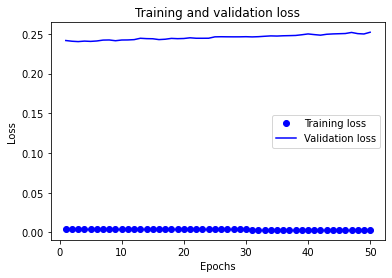

In [53]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()